In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Loading Dataset
test_file = "kdd_test.csv"
train_file = "kdd_train.csv"

In [5]:
#Define column names 
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

In [6]:
train_df = pd.read_csv(train_file, names=columns)
test_df = pd.read_csv(test_file, names=columns)

C:\Users\harsh\AppData\Local\Temp\ipykernel_12104\4216965689.py:1: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_file, names=columns)
C:\Users\harsh\AppData\Local\Temp\ipykernel_12104\4216965689.py:2: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(test_file, names=columns)


In [9]:
print("Train Data:")
print(train_df.head())

Train Data:
   duration  protocol_type   service  flag  src_bytes  dst_bytes  land  \
0  duration  protocol_type   service  flag  src_bytes  dst_bytes  land   
1         0            tcp  ftp_data    SF        491          0     0   
2         0            udp     other    SF        146          0     0   
3         0            tcp   private    S0          0          0     0   
4         0            tcp      http    SF        232       8153     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0  wrong_fragment  urgent  hot  ...  dst_host_srv_count   
1               0       0    0  ...                  25   
2               0       0    0  ...                   1   
3               0       0    0  ...                  26   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0  dst_host_same_srv_rate  dst_host_diff_srv_rate   
1                    0.17                    0.03   
2                       0    

In [10]:
print("Test Data:")
print(test_df.head())

Test Data:
   duration  protocol_type   service  flag  src_bytes  dst_bytes  land  \
0  duration  protocol_type   service  flag  src_bytes  dst_bytes  land   
1         5            tcp      smtp    SF       2429        475     0   
2         0            udp  domain_u    SF         45        134     0   
3         0            udp  domain_u    SF         45         80     0   
4      1979            udp     other    SF        145        105     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0  wrong_fragment  urgent  hot  ...  dst_host_srv_count   
1               0       0    0  ...                  57   
2               0       0    0  ...                 155   
3               0       0    0  ...                 255   
4               0       0    0  ...                   2   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0  dst_host_same_srv_rate  dst_host_diff_srv_rate   
1                    0.11                    0.02   
2                     0.8     

In [16]:
#Data Preprocessing
#Encode Categorical features
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["protocol_type", "service","flag"]
encoder = LabelEncoder()

for col in categorical_columns:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

print("Categorical Features Encoded!")

Categorical Features Encoded!


In [18]:
#Convert Labels into Binary Format
train_df["label"] = train_df["label"].apply(lambda x: 0 if x == "normal" else 1)
test_df["label"] = test_df["label"].apply(lambda x: 0 if x == "normal" else 1)


In [21]:
#error solve part
# Convert all feature columns to numeric
for col in selected_features:
    train_df[col] = pd.to_numeric(train_df[col], errors="coerce")
    test_df[col] = pd.to_numeric(test_df[col], errors="coerce")


In [22]:
#error solve part
# Fill NaN values with 0 (or use another imputation method)
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)


In [23]:
#error solve part
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[selected_features])
X_test_scaled = scaler.transform(test_df[selected_features])


In [20]:
#checking data type for value error
print(train_df[selected_features].dtypes)
print(test_df[selected_features].dtypes)


src_bytes          object
dst_bytes          object
duration           object
serror_rate        object
srv_serror_rate    object
rerror_rate        object
srv_rerror_rate    object
same_srv_rate      object
diff_srv_rate      object
count              object
srv_count          object
dst_host_count     object
dtype: object
src_bytes          object
dst_bytes          object
duration           object
serror_rate        object
srv_serror_rate    object
rerror_rate        object
srv_rerror_rate    object
same_srv_rate      object
diff_srv_rate      object
count              object
srv_count          object
dst_host_count     object
dtype: object


In [25]:
#Select Features for Isolation Forest
from sklearn.preprocessing import StandardScaler
selected_features = [
    "src_bytes", "dst_bytes", "duration", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "count", "srv_count", "dst_host_count"
]

X_train = train_df[selected_features]
y_train = train_df["label"]

X_test = test_df[selected_features]
y_test = test_df["label"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing Complete!")

Data Preprocessing Complete!


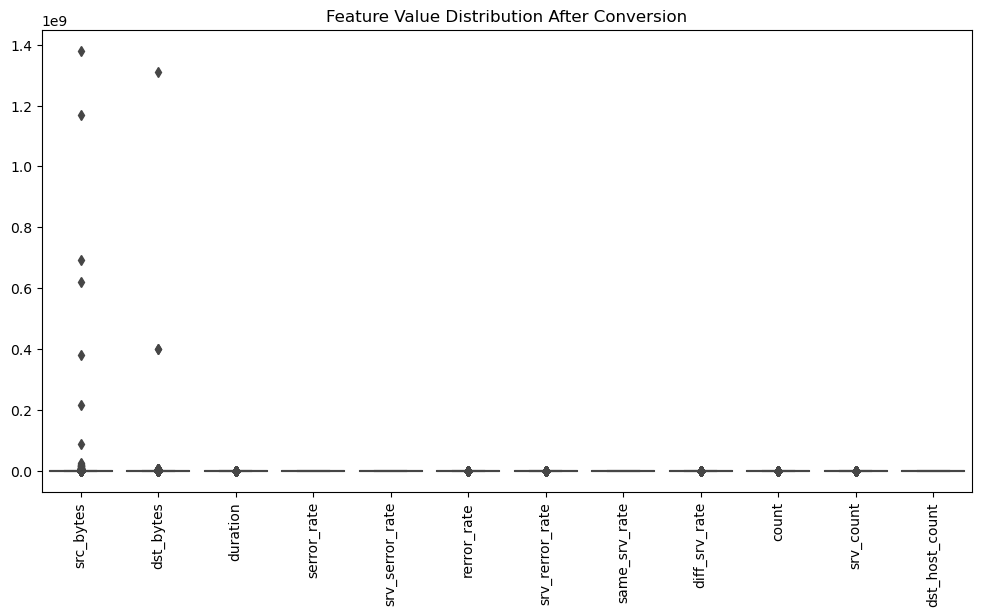

In [26]:
#To check if fixing error affect anomaly detection performance 
#Verifying Feature Distribution After Fix (Boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of numerical features after conversion
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[selected_features])
plt.xticks(rotation=90)
plt.title("Feature Value Distribution After Conversion")
plt.show()


In [29]:
#above boxplot shows src_bytes and dst_bytes have large values compared to other features.
#it causes imbalance in the model and can affect anomaly detection
#log transformation for highly skewed features
#applying log (1+x) transformation to compress extreme values and make it easier for the model to detect anomalies.

import numpy as np

# Apply log transformation to specific features
for col in ["src_bytes", "dst_bytes"]:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])

print("Log Transformation Applied to Skewed Features!")


Log Transformation Applied to Skewed Features!


In [27]:
#Validate That No NaN Values Exist
print("Missing values in Training Data:")
print(train_df[selected_features].isnull().sum())

print("Missing values in Test Data:")
print(test_df[selected_features].isnull().sum())


Missing values in Training Data:
src_bytes          0
dst_bytes          0
duration           0
serror_rate        0
srv_serror_rate    0
rerror_rate        0
srv_rerror_rate    0
same_srv_rate      0
diff_srv_rate      0
count              0
srv_count          0
dst_host_count     0
dtype: int64
Missing values in Test Data:
src_bytes          0
dst_bytes          0
duration           0
serror_rate        0
srv_serror_rate    0
rerror_rate        0
srv_rerror_rate    0
same_srv_rate      0
diff_srv_rate      0
count              0
srv_count          0
dst_host_count     0
dtype: int64


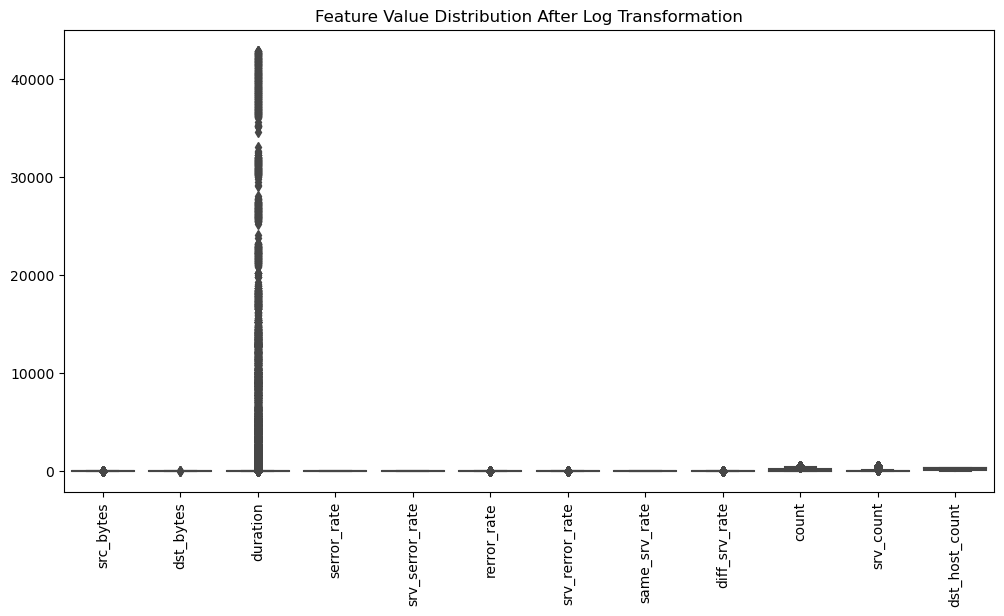

In [30]:
# Re-check the distribution after log transformation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[selected_features])
plt.xticks(rotation=90)
plt.title("Feature Value Distribution After Log Transformation")
plt.show()


In [31]:
# in above boxplotThe duration feature now has extremely large values after transformation.
#cause: log transformation was only applied to src_bytes and dst_bytes, but duration also has very high values.
#Some network traffic durations can be very large, creating skewed distributions.
#Solution → Apply log transformation to duration as well.

# Apply log transformation to duration as well
train_df["duration"] = np.log1p(train_df["duration"])
test_df["duration"] = np.log1p(test_df["duration"])

print("Log Transformation Applied to 'duration' Feature!")


Log Transformation Applied to 'duration' Feature!


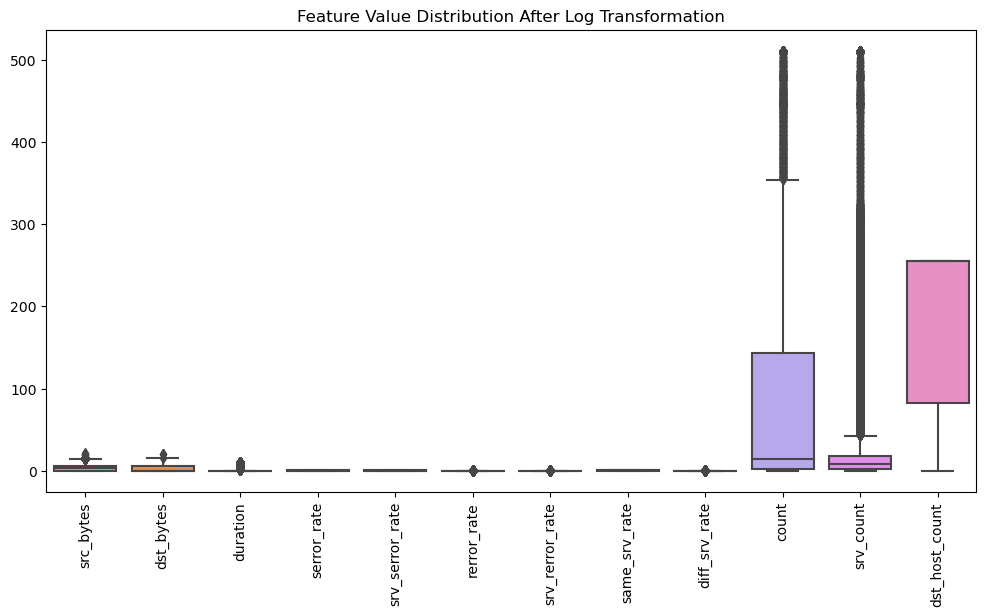

In [33]:
# Re-check feature distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[selected_features])
plt.xticks(rotation=90)
plt.title("Feature Value Distribution After Log Transformation")
plt.show()


In [ ]:
#above boxplot shows: No extreme high values like before,  Features are more balanced, except for a few remaining outliers in count, srv_count, and dst_host_count.
#Log transformation helped stabilize src_bytes, dst_bytes, and duration.
#count and srv_count still have some outliers, but that’s expected in network traffic.
# don't need to remove them now, as Isolation Forest is designed to handle outliers.


In [28]:
#Confirm Scaling Works Correctly
# Check mean and standard deviation after scaling
print("Mean after scaling:", X_train_scaled.mean(axis=0))
print("Standard deviation after scaling:", X_train_scaled.std(axis=0))


Mean after scaling: [ 4.51231356e-19  3.15861949e-18  1.53418661e-17 -1.33451674e-16
 -6.24955428e-17  1.15769045e-17 -7.43967698e-17  9.27844476e-17
 -4.09492456e-17  4.89586021e-17  1.03642202e-17  4.04980142e-17]
Standard deviation after scaling: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
#train Isolation forest
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.04, random_state=42)
iso_forest.fit(X_train_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_train_labels = iso_forest.predict(X_train_scaled)
iso_test_labels = iso_forest.predict(X_test_scaled)

# Convert -1 to 1 (Anomaly) and 1 to 0 (Normal)
iso_train_labels = [1 if x == -1 else 0 for x in iso_train_labels]
iso_test_labels = [1 if x == -1 else 0 for x in iso_test_labels]

print("Isolation Forest Training Complete!")


Isolation Forest Training Complete!


In [38]:
#Apply PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA to keep 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA Applied: Reduced to {X_train_pca.shape[1]} dimensions!")


PCA Applied: Reduced to 8 dimensions!


In [39]:
#Train & Evaluate Isolation Forest

from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.04, random_state=42)
iso_forest.fit(X_train_pca)

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_train_labels = iso_forest.predict(X_train_pca)
iso_test_labels = iso_forest.predict(X_test_pca)

# Convert -1 to 1 (Anomaly) and 1 to 0 (Normal)
iso_train_labels = [1 if x == -1 else 0 for x in iso_train_labels]
iso_test_labels = [1 if x == -1 else 0 for x in iso_test_labels]

print("Isolation Forest Training Complete!")


Isolation Forest Training Complete!


In [40]:
# Evaluate Model Performance
#classification report
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
print("Isolation Forest Performance on Test Set:\n")
print(classification_report(y_test, iso_test_labels))


Isolation Forest Performance on Test Set:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.05      0.09     22545

    accuracy                           0.05     22545
   macro avg       0.50      0.02      0.05     22545
weighted avg       1.00      0.05      0.09     22545



C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#compute AUC score
# Compute AUC Score
auc_score = roc_auc_score(y_test, iso_test_labels)
print(f"AUC Score: {auc_score:.4f}")


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

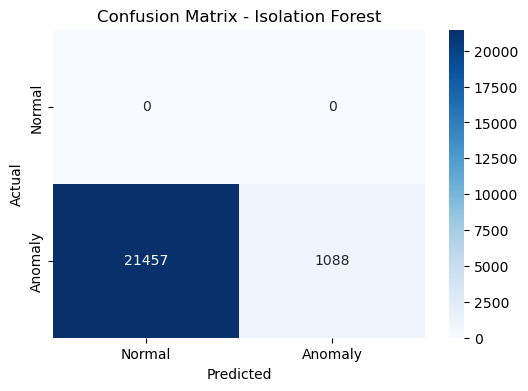

In [42]:
#confusion matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, iso_test_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()


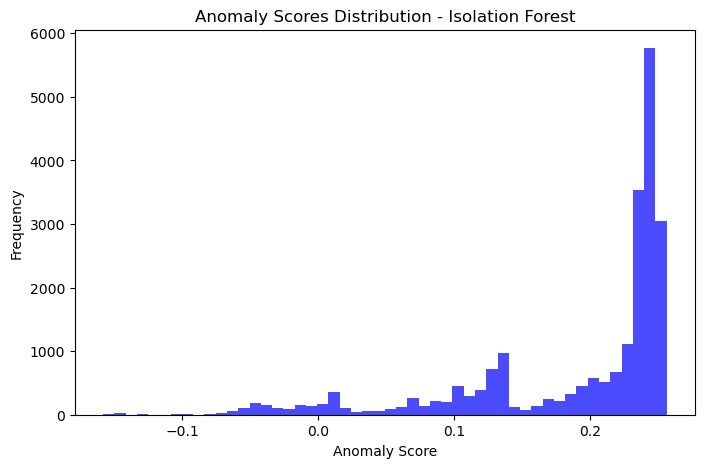

In [43]:
#visualizing anomaly score
# Get Anomaly Scores
anomaly_scores = iso_forest.decision_function(X_test_pca)

# Plot Anomaly Scores
plt.figure(figsize=(8, 5))
plt.hist(anomaly_scores, bins=50, color="blue", alpha=0.7)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Scores Distribution - Isolation Forest")
plt.show()


In [ ]:
#plot representing outliers and inliers on density function

In [46]:
# Convert Isolation Forest predictions (-1 to anomaly, 1 to normal)
outlier_labels = [1 if x == -1 else 0 for x in iso_test_labels]


In [48]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest with a slightly higher contamination level
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)  # Increase contamination to 10%
iso_forest.fit(X_train_scaled)

# Predict anomalies
iso_test_labels = iso_forest.predict(X_test_scaled)

# Convert -1 to 1 (Anomaly) and 1 to 0 (Normal)
outlier_labels = [1 if x == -1 else 0 for x in iso_test_labels]

# Get anomaly scores again
anomaly_scores = iso_forest.decision_function(X_test_scaled)

print("✅ Isolation Forest Retrained with Higher Contamination!")


✅ Isolation Forest Retrained with Higher Contamination!


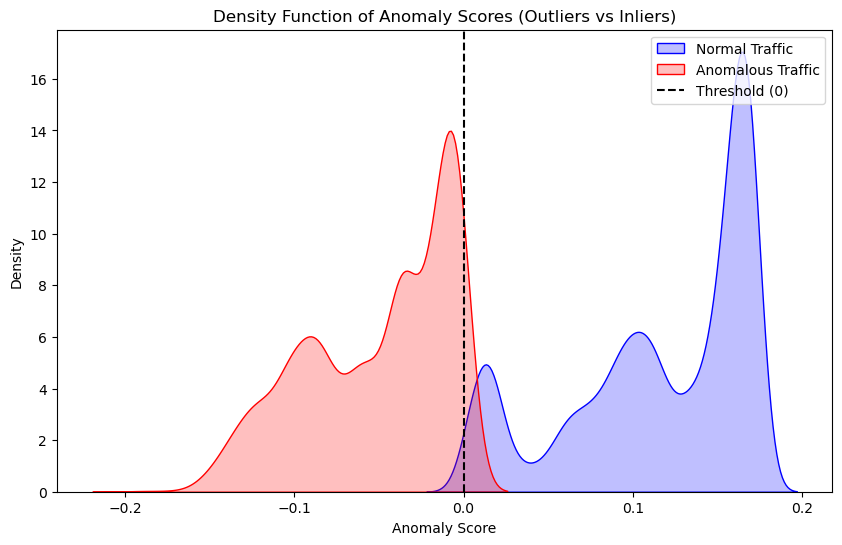

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame for visualization
df_anomaly = pd.DataFrame({"Anomaly Score": anomaly_scores, "Label": outlier_labels})

# Plot Density Function
plt.figure(figsize=(10, 6))
sns.kdeplot(df_anomaly[df_anomaly["Label"] == 0]["Anomaly Score"], label="Normal Traffic", fill=True, color="blue")
sns.kdeplot(df_anomaly[df_anomaly["Label"] == 1]["Anomaly Score"], label="Anomalous Traffic", fill=True, color="red")

plt.axvline(x=0, color="black", linestyle="--", label="Threshold (0)")
plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.title("Density Function of Anomaly Scores (Outliers vs Inliers)")
plt.legend()
plt.show()
